# **1. Khai báo thư viện cần thiết.**

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# **2. Upsampling Data.**

Theo quan sát khi thực hiện trực quan hóa dữ liệu, ta có thể thấy được sự mất cân bằng giữa các lớp trong dữ liệu. Vì thế ta sẽ tìm phương pháp để cải thiện việc này.

Trước hết cùng quan sát lại phân bố các lớp trong dữ liệu sau khi tiền xử lý.

In [2]:
df=pd.read_csv('Data/Preprocessing/preprocessing_data.csv')
df.head()

,title,address,square_area,square_in_use,bedroom,wc,num_floor,width,height,door,certificates,house_type,furniture_status,house_specific,price_m2,price_square,location,in_centroid
0,MT TRẦN HƯNG ĐẠO . PHƯỜNG NGUYỄN CƯ TRINH . QU...,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",2,1,2,2,1,0,2,NaN,0,1,0,0,4,1,0,1
1,"Bán nhà chính chủ, hẻm xe hoi tới nhà","88/89, Nguyễn Van Quy, Phường Nguyễn Cư Trinh,...",2,2,1,1,0,0,2,Tây Nam,0,1,3,1,2,1,0,1
2,"Bán Nhà Nguyễn Trãi , 5 lầu 19P Thu Nhập 120tr/th","Đường Nguyễn Trãi, Phường Nguyễn Cư Trinh, Quậ...",3,2,2,2,1,2,1,NaN,0,2,3,1,0,4,0,1
3,Bán khách sạn mặt tiền đường NGUYỄN AN NINH P BẾN,"34, Đường Nguyễn An Ninh, Phường Bến Thành, Qu...",3,3,2,2,1,0,2,NaN,0,1,3,2,4,3,0,1
4,DO CHUYỂN NHÀ RA HÀ NỘI BÁN GẤP TRẦN ĐÌNH XU Q.1,"Đường Trần Đình Xu, Phường Cô Giang, Quận 1, T...",1,1,1,1,0,1,1,NaN,0,2,3,0,1,4,0,1


In [3]:
df['house_type'].value_counts()

2    8333
1    8009
0    1294
3     899
Name: house_type, dtype: int64

Ta có thể thấy, 2 lớp gần nhau nhất là 1 và 2, trong khi lớp 0 và 3 cách rất xa giá trị hiện có của 2 lớp còn lại.

Ta sẽ dùng kỹ thuật ***upsampling*** để xử lý việc này:  
- Một cách ngắn gọn, ***upsampling*** là một phương pháp cho phép nhân nhiều lần số dòng dữ liệu theo một `n_sample` định trước, mục đích là làm cho dữ liệu giữa các thuộc tính mong muốn trở nên cân bằng hơn.   
- Nếu để ý ta sẽ thấy nó đối nghịch với việc ta xóa các trùng lắp dữ liệu ban đầu. Tuy nhiên việc xóa các trùng lắp dữ liệu ban đầu dựa trên việc ta chưa biết dữ liệu trùng lắp ra sao, còn về việc ta thực hiện upsampling để nhân dữ liệu lên là có chủ đích chỉ tạo thêm những dòng dữ liệu trên các lớp (thuộc tính) mong muốn để dữ liệu trở nên cân bằng hơn (có thể sẽ tốt cho việc học hơn).

Đầu tiên để có thể kiểm tra rằng các mô hình học trên dữ liệu đã upsampling có thể hoạt động tốt với dữ liệu mới chưa nhìn thấy hya không, trước khi thực hiện upsampling, ta sẽ lấy 20% dữ liệu ban đầu làm tập kiểm thử cuối cùng sau khi đưa ra được mô hình tốt nhất và không tác động đến nó.

In [4]:
data_up,data_test=train_test_split(df,test_size=0.2)

In [5]:
print('Upsampling data: ',len(data_up))
print('Test data: ',len(data_test))

Upsampling data:  14828
Test data:  3707


Bây giờ, ta thống kê lại gía trị các lớp trên tập `data_up`:

In [6]:
data_up['house_type'].value_counts()

2    6653
1    6423
0    1044
3     708
Name: house_type, dtype: int64

Với giá trị dữ liệu cao nhất à 6600 mẫu thuộc về lớp 1, ta sẽ thực hiện resample data các lớp còn lại sao cho dữ liệu lệch không quá nhiều.

In [7]:
htype_0=data_up[data_up['house_type']==0]
htype_1=data_up[data_up['house_type']==1]
htype_2=data_up[data_up['house_type']==2]
htype_3=data_up[data_up['house_type']==3]

In [8]:
htype0_upsamp=resample(htype_0,replace=True,n_samples=6600,random_state=123)
data=pd.concat([htype0_upsamp,htype_1])

htype1_upsamp=resample(htype_1,replace=True,n_samples=200,random_state=123)
data=pd.concat([htype1_upsamp,data])

htype3_upsamp=resample(htype_3,replace=True,n_samples=6600,random_state=123)
data=pd.concat([htype3_upsamp,data])

data=pd.concat([htype_2,data])

In [9]:
data['house_type'].value_counts()

2    6653
1    6623
3    6600
0    6600
Name: house_type, dtype: int64

<AxesSubplot:>

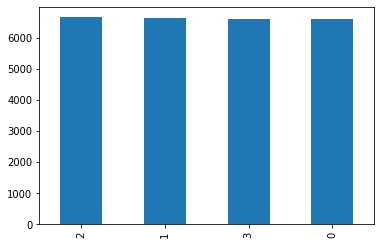

In [10]:
data['house_type'].value_counts().plot.bar()

Sau khi thực hiện upsampling với các `n_sample` phù hợp cho từng lớp khác nhau, quan sát trên biểu đồ lại, ta thấy số lượng các lớp trong thuộc tính giờ đã cân bằng hơn.

Hãy cùng xem lại độ tương quan giữa các thuộc tính, sau khi thực hiện up-sampling dữ liệu.

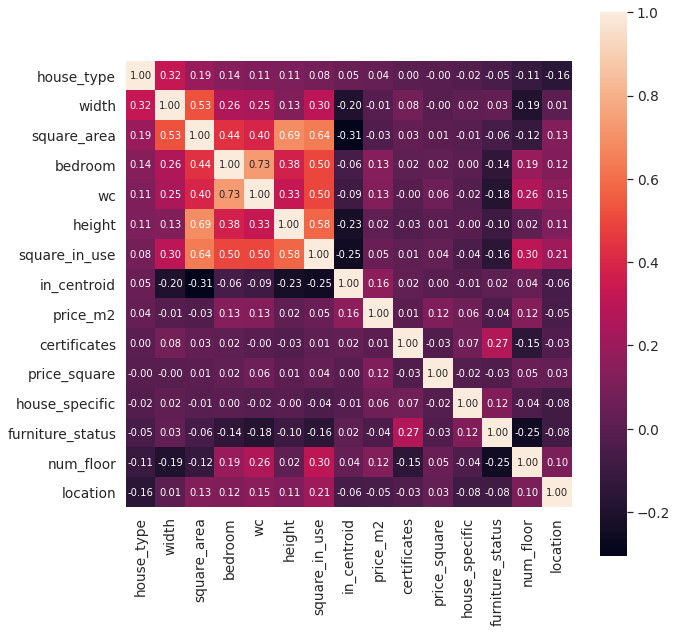

In [11]:
k = 15
corrmat = data.corr()
cols = corrmat.nlargest(k, 'house_type')['house_type'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

***Nhận xét:*** Rõ ràng so với bảng độ tương quan trước đấy (trừ những thuộc tính bị lệch đặc thù khá nhiều như `num_floor`, `location`,..), độ tương quan của các biến cùng với thuộc tính lớp `house_type` đã tăng nhiều.

# **3. Lựa chọn mô hình học.**

## 3.1. Chia dữ liệu train, test, validation.

Ta xác định các thuộc sẽ đưa vào để huấn luyện mô hình và thuộc tính dự đoán.  
Ở đây, chúng em sử dụng tất cả các thuộc tính đã được xử lý để làm đầu vào cho các mô hình (do nhận thấy các dữ liệu đều được xử lý khá tốt).

In [12]:
col_train=['furniture_status','price_m2','price_square','house_specific','width','height','bedroom','wc','square_area','square_in_use','certificates','num_floor','location','in_centroid']
label=['house_type']
obj_col=['furniture_status','house_specific','certificates','location','in_centroid']

for name in col_train:
    data[name]=data[name].astype(object)

In [13]:
for name in col_train:
    data_test[name]=data_test[name].astype(object)
    
x_test=data_test[col_train]
y_test=data_test['house_type']
    
x_test=pd.get_dummies(x_test)

<ipython-input-13-7ed8d5e65143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[name]=data_test[name].astype(object)


In [14]:
x=data[col_train]
y=data[label]

x=pd.get_dummies(x)
x.head()

,furniture_status_0,furniture_status_1,furniture_status_2,furniture_status_3,price_m2_0,price_m2_1,price_m2_2,price_m2_3,price_m2_4,price_square_0,...,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,in_centroid_0,in_centroid_1
11652,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6646,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1572,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8472,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
939,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


Thực hiện chia dữ liệu thành các tập train, test và validation. Tuy nhiên ta đã dùng 1 tập dữ liệu ban đầu để làm test nên ta chỉ cần dùng tập validation để điều chỉnh tham số mô hình.

In [15]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=0)
print('x_train: ',len(x_train))
print('y_train: ',len(y_train))

print('x_val: ',len(x_val))
print('y_val: ',len(y_val))

x_train:  21180
y_train:  21180
x_val:  5296
y_val:  5296


## 3.2. Huấn luyện mô hình.

In [39]:
score_train=[]
score_val=[]

# ***Random Forest***

Mô hình đầu tiên được chọn là `Random Forest`.

Ta sẽ thực hiện huấn luyện mô hình trên tập train và ước lượng độ lỗi trong ngoài mẫu trên tập validation với đa tham số nhầm tìm ra tham số tối ưu nhất:
- Số lượng cây: thử với 50, 100, 500.
- Độ sâu tối đa mỗi cây: thử với [1:30].
- Độ đo sử dụng: thử với `gini` và `entropy`

In [17]:
Ein_50=[]
Eout_50=[]

Ein_100=[]
Eout_100=[]

Ein_500=[]
Eout_500=[]
count=1
total_loop=30

dt_rf_gini=[]

for i in range(1,31):
    print('INFO: {}/{} - Max depth={}.'.format(count,total_loop,i))
    
    random_for_50=RandomForestClassifier(max_depth=i,n_estimators=50)
    random_for_100=RandomForestClassifier(max_depth=i,n_estimators=100)
    random_for_500=RandomForestClassifier(max_depth=i,n_estimators=500)
    
    random_for_50.fit(x_train,y_train.values.ravel())
    random_for_100.fit(x_train,y_train.values.ravel())
    random_for_500.fit(x_train,y_train.values.ravel())
    
    Ein_50.append(random_for_50.score(x_train,y_train))
    Eout_50.append(random_for_50.score(x_val,y_val))
    Ein_100.append(random_for_100.score(x_train,y_train))
    Eout_100.append(random_for_100.score(x_val,y_val))
    Ein_500.append(random_for_500.score(x_train,y_train))
    Eout_500.append(random_for_500.score(x_val,y_val))
    
    dt_rf_gini.append(np.array([50,i,random_for_50.score(x_train,y_train),random_for_50.score(x_val,y_val)]))
    dt_rf_gini.append(np.array([100,i,random_for_100.score(x_train,y_train),random_for_100.score(x_val,y_val)]))
    dt_rf_gini.append(np.array([500,i,random_for_500.score(x_train,y_train),random_for_500.score(x_val,y_val)]))
    
    print('INFO: Random Forest - criterion=gini - max depth={} is done!'.format(i))
    
    count+=1

INFO: 1/30 - Max depth=1.
INFO: Random Forest - criterion=gini - max depth=1 is done!
INFO: 2/30 - Max depth=2.
INFO: Random Forest - criterion=gini - max depth=2 is done!
INFO: 3/30 - Max depth=3.
INFO: Random Forest - criterion=gini - max depth=3 is done!
INFO: 4/30 - Max depth=4.
INFO: Random Forest - criterion=gini - max depth=4 is done!
INFO: 5/30 - Max depth=5.
INFO: Random Forest - criterion=gini - max depth=5 is done!
INFO: 6/30 - Max depth=6.
INFO: Random Forest - criterion=gini - max depth=6 is done!
INFO: 7/30 - Max depth=7.
INFO: Random Forest - criterion=gini - max depth=7 is done!
INFO: 8/30 - Max depth=8.
INFO: Random Forest - criterion=gini - max depth=8 is done!
INFO: 9/30 - Max depth=9.
INFO: Random Forest - criterion=gini - max depth=9 is done!
INFO: 10/30 - Max depth=10.
INFO: Random Forest - criterion=gini - max depth=10 is done!
INFO: 11/30 - Max depth=11.
INFO: Random Forest - criterion=gini - max depth=11 is done!
INFO: 12/30 - Max depth=12.
INFO: Random Forest 

In [18]:
pd.set_option('display.max_rows',None)
err_rf_gini=pd.DataFrame(data=dt_rf_gini,columns=['n_estimators','max_depth','E_in','E_out'])
err_rf_gini

,n_estimators,max_depth,E_in,E_out
0,50.0,1.0,0.506610,0.499434
1,100.0,1.0,0.507979,0.499622
2,500.0,1.0,0.524740,0.513595
3,50.0,2.0,0.547686,0.540408
4,100.0,2.0,0.547309,0.539275
5,500.0,2.0,0.552408,0.543807
6,50.0,3.0,0.571624,0.565332
7,100.0,3.0,0.575637,0.569864
8,500.0,3.0,0.588338,0.582515
9,50.0,4.0,0.616053,0.608195


[]

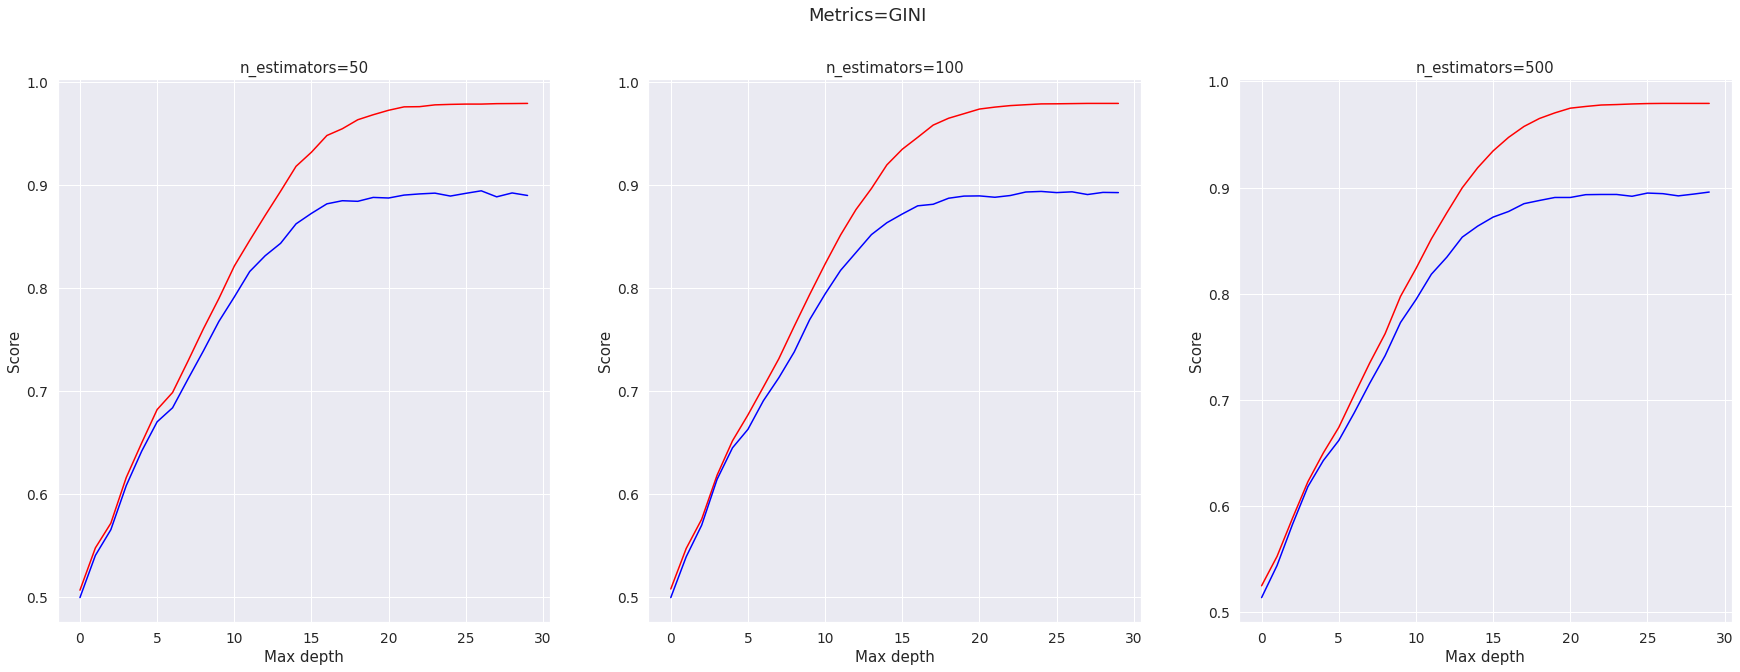

In [19]:
plt.figure(figsize=(30,10))
plt.suptitle('Metrics=GINI')

plt.subplot(131)
plt.title('n_estimators=50')
plt.plot(range(30),Ein_50,color='red')
plt.plot(range(30),Eout_50,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')

plt.subplot(132)
plt.title('n_estimators=100')
plt.plot(range(30),Ein_100,color='red')
plt.plot(range(30),Eout_100,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')

plt.subplot(133)
plt.title('n_estimators=500')
plt.plot(range(30),Ein_500,color='red')
plt.plot(range(30),Eout_500,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.plot()

In [20]:
Ein_50=[]
Eout_50=[]

Ein_100=[]
Eout_100=[]

Ein_500=[]
Eout_500=[]
count=1
total_loop=30

dt_rf_entro=[]

for i in range(1,31):
    print('INFO: {}/{} - Max depth={}.'.format(count,total_loop,i))
    
    random_for_50=RandomForestClassifier(max_depth=i,n_estimators=50,criterion='entropy')
    random_for_100=RandomForestClassifier(max_depth=i,n_estimators=100,criterion='entropy')
    random_for_500=RandomForestClassifier(max_depth=i,n_estimators=500,criterion='entropy')
    
    random_for_50.fit(x_train,y_train.values.ravel())
    random_for_100.fit(x_train,y_train.values.ravel())
    random_for_500.fit(x_train,y_train.values.ravel())
    
    Ein_50.append(random_for_50.score(x_train,y_train))
    Eout_50.append(random_for_50.score(x_val,y_val))
    Ein_100.append(random_for_100.score(x_train,y_train))
    Eout_100.append(random_for_100.score(x_val,y_val))
    Ein_500.append(random_for_500.score(x_train,y_train))
    Eout_500.append(random_for_500.score(x_val,y_val))
    
    dt_rf_entro.append(np.array([50,i,random_for_50.score(x_train,y_train),random_for_50.score(x_val,y_val)]))
    dt_rf_entro.append(np.array([100,i,random_for_100.score(x_train,y_train),random_for_100.score(x_val,y_val)]))
    dt_rf_entro.append(np.array([500,i,random_for_500.score(x_train,y_train),random_for_500.score(x_val,y_val)]))
    
    print('INFO: Random Forest - criterion=entropy - max depth={} is done!'.format(i))
    
    
    count+=1

INFO: 1/30 - Max depth=1.
INFO: Random Forest - criterion=entropy - max depth=1 is done!
INFO: 2/30 - Max depth=2.
INFO: Random Forest - criterion=entropy - max depth=2 is done!
INFO: 3/30 - Max depth=3.
INFO: Random Forest - criterion=entropy - max depth=3 is done!
INFO: 4/30 - Max depth=4.
INFO: Random Forest - criterion=entropy - max depth=4 is done!
INFO: 5/30 - Max depth=5.
INFO: Random Forest - criterion=entropy - max depth=5 is done!
INFO: 6/30 - Max depth=6.
INFO: Random Forest - criterion=entropy - max depth=6 is done!
INFO: 7/30 - Max depth=7.
INFO: Random Forest - criterion=entropy - max depth=7 is done!
INFO: 8/30 - Max depth=8.
INFO: Random Forest - criterion=entropy - max depth=8 is done!
INFO: 9/30 - Max depth=9.
INFO: Random Forest - criterion=entropy - max depth=9 is done!
INFO: 10/30 - Max depth=10.
INFO: Random Forest - criterion=entropy - max depth=10 is done!
INFO: 11/30 - Max depth=11.
INFO: Random Forest - criterion=entropy - max depth=11 is done!
INFO: 12/30 - M

In [21]:
pd.set_option('display.max_rows',None)
err_rf_entro=pd.DataFrame(data=dt_rf_entro,columns=['n_estimators','max_depth','E_in','E_out'])
err_rf_entro

,n_estimators,max_depth,E_in,E_out
0,50.0,1.0,0.498442,0.487727
1,100.0,1.0,0.506799,0.499434
2,500.0,1.0,0.510812,0.500755
3,50.0,2.0,0.553069,0.542296
4,100.0,2.0,0.547639,0.534932
5,500.0,2.0,0.548253,0.537953
6,50.0,3.0,0.584042,0.583648
7,100.0,3.0,0.578376,0.571375
8,500.0,3.0,0.583711,0.577417
9,50.0,4.0,0.620727,0.617258


[]

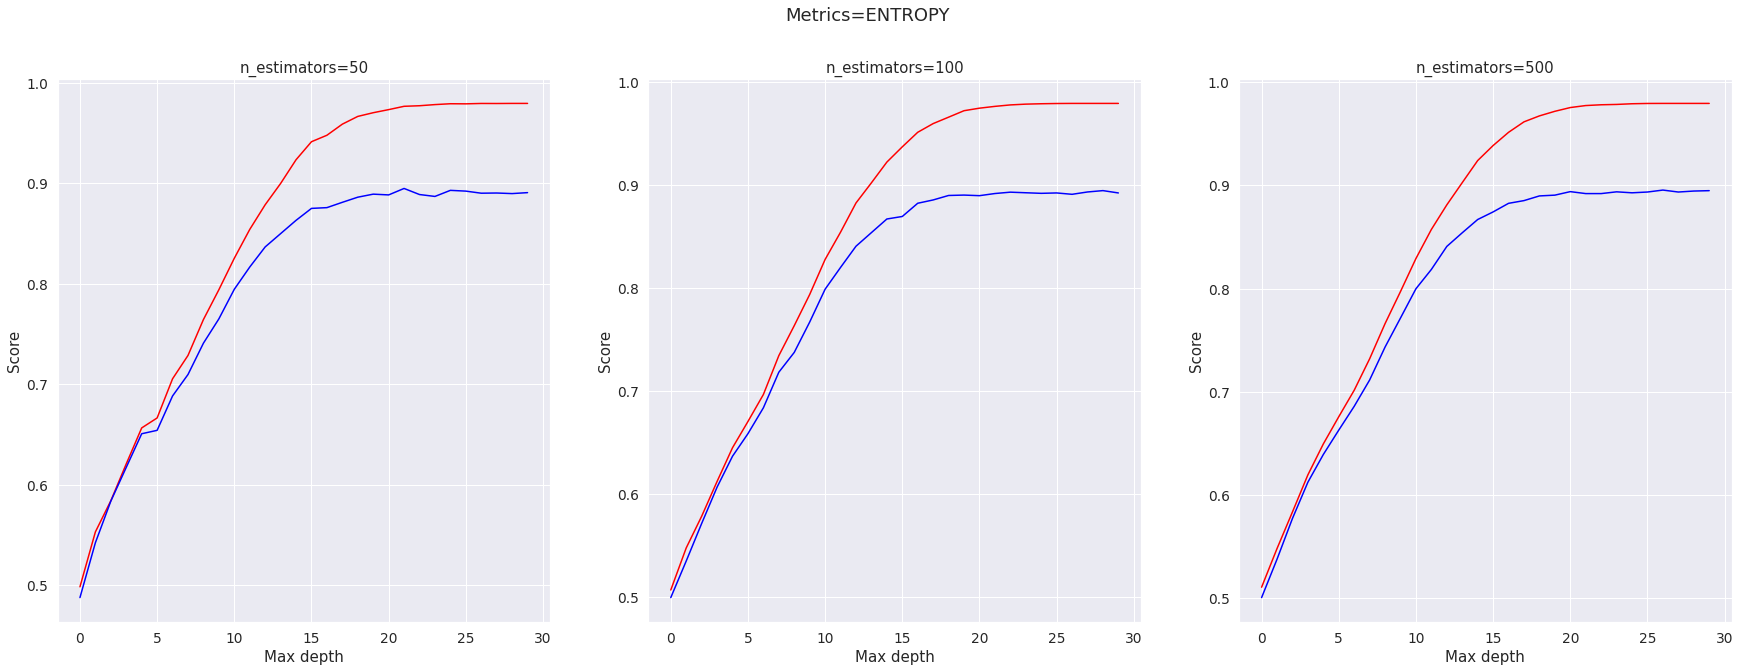

In [22]:
plt.figure(figsize=(30,10))
plt.suptitle('Metrics=ENTROPY')

plt.subplot(131)
plt.title('n_estimators=50')
plt.plot(range(30),Ein_50,color='red')
plt.plot(range(30),Eout_50,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')

plt.subplot(132)
plt.title('n_estimators=100')
plt.plot(range(30),Ein_100,color='red')
plt.plot(range(30),Eout_100,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')

plt.subplot(133)
plt.title('n_estimators=500')
plt.plot(range(30),Ein_500,color='red')
plt.plot(range(30),Eout_500,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.plot()

Mô hình quan sát cho kết quả tốt nhất trên tham số với độ đo là `entropy`, số lượng cây là `500` và độ sâu là `27`.  
Điểm đạt được trên tập train là ~0.98 và validation là 0.89. Ta chọn mô hình Random Forest với các thông số như trên.

In [40]:
rf=RandomForestClassifier(criterion='entropy',max_depth=27,n_estimators=500)
rf.fit(x_train,y_train.values.ravel())
score_train.append(rf.score(x_train,y_train))
score_val.append(rf.score(x_val,y_val))

# ***Support Vector Machine***

Thử nghiệm tiếp với mô hình Support Vector Machine trên 2 kernel:
- Linear (tuyến tính): điều chỉnh siêu tham số phạt C để điều chỉnh soft-margin.
- RBF: điều chỉnh 2 tham số bao gồm C và bán kính Gaussian (Gamma).

In [24]:
pC_linear=[0.001,0.01,0.1,1,10,100]
pC=[0.01,0.1,1,10,100]
gamma=[0.01,0.1,1,10,100]

Đầu tiên ta thử nghiệm với ***linear kernel***.

In [25]:
Ein=[]
Eout=[]

dt_linear=[]
for c in pC_linear:
    svc_linear=SVC(kernel='linear',C=c)
    svc_linear.fit(x_train,y_train.values.ravel())
    Ein.append(svc_linear.score(x_train,y_train))
    Eout.append(svc_linear.score(x_val,y_val))
    
    print('INFO: Linear kernel SVM, C={} is done!'.format(c))
    dt_linear.append(np.array([c,svc_linear.score(x_train,y_train),svc_linear.score(x_val,y_val)]))

INFO: Linear kernel SVM, C=0.001 is done!
INFO: Linear kernel SVM, C=0.01 is done!
INFO: Linear kernel SVM, C=0.1 is done!
INFO: Linear kernel SVM, C=1 is done!
INFO: Linear kernel SVM, C=10 is done!
INFO: Linear kernel SVM, C=100 is done!


In [26]:
pd.set_option('display.max_rows',None)
err_table1=pd.DataFrame(data=dt_linear,columns=['C','E_in','E_out'])
err_table1

,C,E_in,E_out
0,0.001,0.636119,0.632742
1,0.010,0.669358,0.668429
2,0.100,0.690368,0.685989
3,1.000,0.703399,0.694675
4,10.000,0.703447,0.694864
5,100.000,0.703541,0.695997


Text(0, 0.5, 'Score')

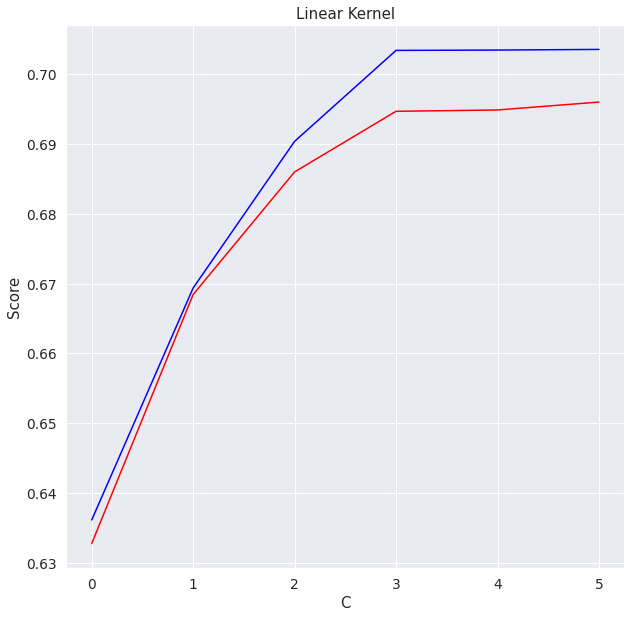

In [27]:
plt.figure(figsize=(10,10))
plt.plot(Ein,color='blue')
plt.plot(Eout,color='red')
plt.title('Linear Kernel')
plt.xlabel('C')
plt.ylabel('Score')

Kế tiếp là ***RBF kernel*** với tập tham số thử:
- C: 0.01, 0.1, 1, 10, 100
- $\gamma$: 0.01, 0.1, 1, 10, 100

In [28]:
Ein=[]
Eout=[]
dt_rbf=[]

for c in pC:
    for g in gamma:
        svc_linear=SVC(kernel='rbf',C=c,gamma=g)
        svc_linear.fit(x_train,y_train.values.ravel())
        Ein.append(svc_linear.score(x_train,y_train))
        Eout.append(svc_linear.score(x_val,y_val))
        
        print('INFO: RBF Kernel SVM C={} - Gamma={} is done!'.format(c,g))
        dt_rbf.append(np.array([c,g,svc_linear.score(x_train,y_train),svc_linear.score(x_val,y_val)]))

INFO: RBF Kernel SVM C=0.01 - Gamma=0.01 is done!
INFO: RBF Kernel SVM C=0.01 - Gamma=0.1 is done!
INFO: RBF Kernel SVM C=0.01 - Gamma=1 is done!
INFO: RBF Kernel SVM C=0.01 - Gamma=10 is done!
INFO: RBF Kernel SVM C=0.01 - Gamma=100 is done!
INFO: RBF Kernel SVM C=0.1 - Gamma=0.01 is done!
INFO: RBF Kernel SVM C=0.1 - Gamma=0.1 is done!
INFO: RBF Kernel SVM C=0.1 - Gamma=1 is done!
INFO: RBF Kernel SVM C=0.1 - Gamma=10 is done!
INFO: RBF Kernel SVM C=0.1 - Gamma=100 is done!
INFO: RBF Kernel SVM C=1 - Gamma=0.01 is done!
INFO: RBF Kernel SVM C=1 - Gamma=0.1 is done!
INFO: RBF Kernel SVM C=1 - Gamma=1 is done!
INFO: RBF Kernel SVM C=1 - Gamma=10 is done!
INFO: RBF Kernel SVM C=1 - Gamma=100 is done!
INFO: RBF Kernel SVM C=10 - Gamma=0.01 is done!
INFO: RBF Kernel SVM C=10 - Gamma=0.1 is done!
INFO: RBF Kernel SVM C=10 - Gamma=1 is done!
INFO: RBF Kernel SVM C=10 - Gamma=10 is done!
INFO: RBF Kernel SVM C=10 - Gamma=100 is done!
INFO: RBF Kernel SVM C=100 - Gamma=0.01 is done!
INFO: RBF

In [29]:
pd.set_option('display.max_rows',None)
err_table2=pd.DataFrame(data=dt_rbf,columns=['C','Gamma','E_in','E_out'])
err_table2

,C,Gamma,E_in,E_out
0,0.01,0.01,0.583003,0.581382
1,0.01,0.10,0.626204,0.622545
2,0.01,1.00,0.253069,0.244147
3,0.01,10.00,0.253069,0.244147
4,0.01,100.00,0.253069,0.244147
5,0.10,0.01,0.656468,0.653134
6,0.10,0.10,0.747498,0.731495
7,0.10,1.00,0.616053,0.544940
8,0.10,10.00,0.489471,0.423338
9,0.10,100.00,0.489471,0.423338


Với SVM, ta nhận thấy tham số tối ưu nhất là C=10 và $\gamma$=0.1 với RBF là cho kết quả tốt nhất trên cả tập train và validation (0.98 với train và 0.88 với validation). Ta chọn làm mô hình tốt nhất cho SVM.

In [41]:
svc=SVC(C=10,gamma=0.1,kernel='rbf')
svc.fit(x_train,y_train.values.ravel())
score_train.append(svc.score(x_train,y_train))
score_val.append(svc.score(x_val,y_val))

# ***Decision Tree***

Mô hình cuối cùng được chọn là Cây quyết định, ta sẽ điều chỉnh tham số với độ sâu tối đa (`max_depth`) từ 1:100.

In [42]:
score=[]
score_tree=[]
for i in range(1,100):
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train.values.ravel())
    score.append([i,model.score(x_train,y_train),model.score(x_val,y_val)])
    
    score_tree.append([model.score(x_train,y_train),model.score(x_val,y_val)])
    
    print('INFO: Decision Tree - max depth={} is done!'.format(i))

INFO: Decision Tree - max depth=1 is done!
INFO: Decision Tree - max depth=2 is done!
INFO: Decision Tree - max depth=3 is done!
INFO: Decision Tree - max depth=4 is done!
INFO: Decision Tree - max depth=5 is done!
INFO: Decision Tree - max depth=6 is done!
INFO: Decision Tree - max depth=7 is done!
INFO: Decision Tree - max depth=8 is done!
INFO: Decision Tree - max depth=9 is done!
INFO: Decision Tree - max depth=10 is done!
INFO: Decision Tree - max depth=11 is done!
INFO: Decision Tree - max depth=12 is done!
INFO: Decision Tree - max depth=13 is done!
INFO: Decision Tree - max depth=14 is done!
INFO: Decision Tree - max depth=15 is done!
INFO: Decision Tree - max depth=16 is done!
INFO: Decision Tree - max depth=17 is done!
INFO: Decision Tree - max depth=18 is done!
INFO: Decision Tree - max depth=19 is done!
INFO: Decision Tree - max depth=20 is done!
INFO: Decision Tree - max depth=21 is done!
INFO: Decision Tree - max depth=22 is done!
INFO: Decision Tree - max depth=23 is don

In [43]:
pd.set_option('display.max_rows',None)
des=pd.DataFrame(data=score,columns=['Max depth','E_in','E_out'])
des

,Max depth,E_in,E_out
0,1,0.436922,0.425793
1,2,0.461473,0.450906
2,3,0.517375,0.503399
3,4,0.559065,0.546073
4,5,0.593296,0.581949
5,6,0.620208,0.607628
6,7,0.648914,0.629343
7,8,0.678140,0.661254
8,9,0.706893,0.686745
9,10,0.739566,0.719789


Text(0, 0.5, 'Score')

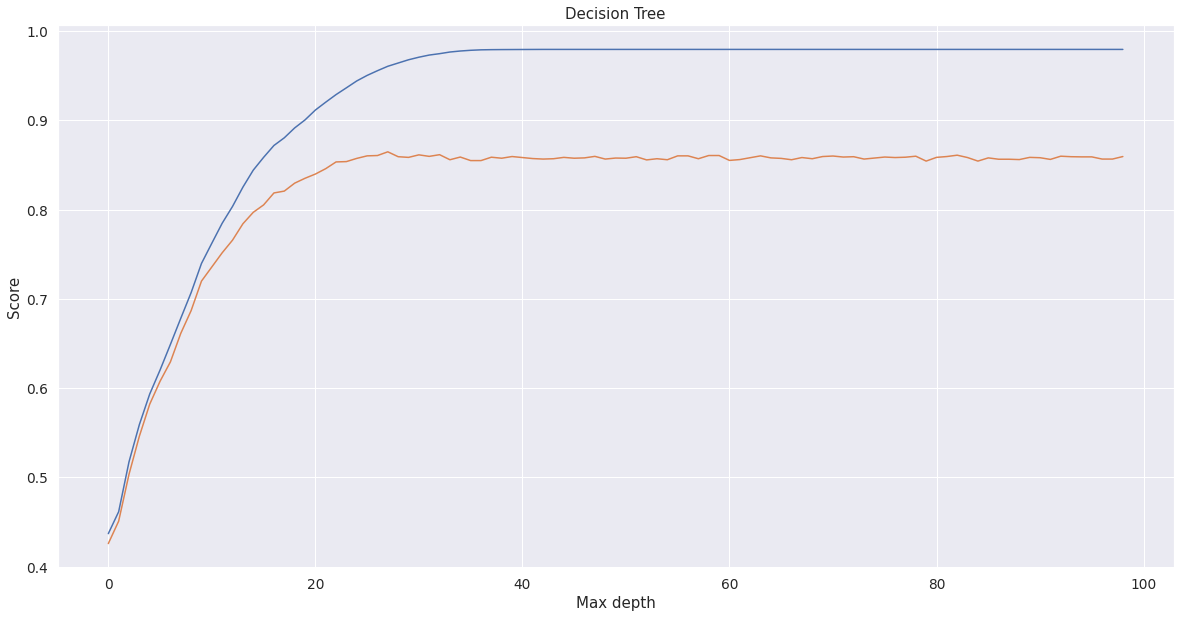

In [44]:
plt.figure(figsize=(20,10))
plt.plot(score_tree)
plt.title('Decision Tree')
plt.xlabel('Max depth')
plt.ylabel('Score')

Cuối cùng là với Cây quyết định, ta thấy mô hình cho kết quả tốt nhất ở `max_depth`=28 với train_score=0.96 và val_score=0.86.

In [45]:
decision=DecisionTreeClassifier(max_depth=28)
decision.fit(x_train,y_train.values.ravel())
score_train.append(decision.score(x_train,y_train))
score_val.append(decision.score(x_val,y_val))

In [46]:
data=np.array([score_train,score_val])

Text(0.5, 0, 'Model')

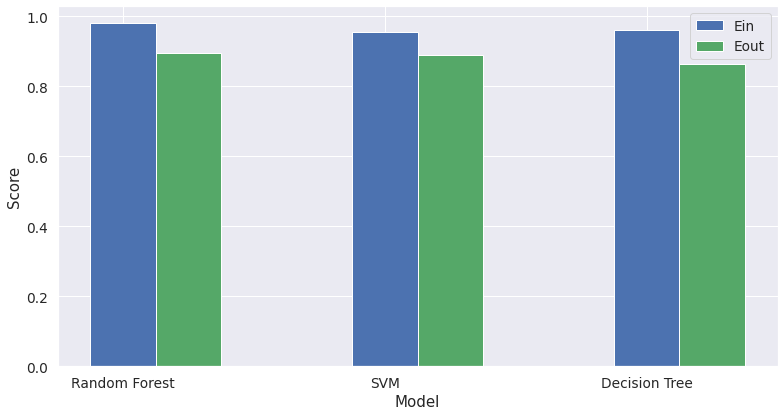

In [47]:
X = np.arange(3)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)

ax.legend(labels=['Ein', 'Eout'])
ax.set_xticks(X)
ax.set_xticklabels(['Random Forest','SVM','Decision Tree'])
plt.ylabel('Score')
plt.xlabel('Model')

### ***Đánh giá trên tập kiểm thử.***

Theo quan sát có được, ta có thể thấy mô hình cho kết quả tốt nhất trên cả tập train và validation là Random Forest, do đó ta sẽ dùng mô hình này để dự đoán cho tập test.

Huấn luyện lại mô hình với tham số tối ưu trên toàn bộ dữ liệu được upsampling.

In [48]:
our_model=RandomForestClassifier(criterion='entropy',max_depth=27,n_estimators=500)
our_model.fit(x,y.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=27, n_estimators=500)

Cùng xem kết quả trên tập test đã chuẩn bị ban đầu:

In [49]:
our_model.score(x,y),our_model.score(x_test,y_test)

(0.9789998489197764, 0.7677367143242514)

***Nhận xét:***
- Mô hình đưa ra có thể dự đoán được ở mức khá tốt với dữ liệu đã upsampling, nguyên nhân do các dòng dữ liệu được nhân lên chia train test thì khả năng các dòng dữ liệu trong train và test sẽ có giống nhau, vì thế mô hình sẽ trả lời tốt hơn.
- Tuy nhiên với dữ liệu ban đầu ta tách ra để riêng dành cho quá trình kiểm thử cuối cùng, điểm số được đánh giá không cao như so với tập validation đã kiểm thử. Điều này có thể dễ suy đoán ra được cho dữ liệu ban đầu tách ra là 1 tập hoàn toàn mới so với dữ liệu cũ là hoàn toàn không tồn tại các dòng dữ liệu trùng lắp với các dòng trong tập huấn luyện, do đó, hiệu suất của mô hình giảm đi (nhưng không phải quá thấp mặc dù chưa gọi là cao khi đạt 0.76 so với validation đạt được 0.89 và tập huấn luyện đạt được xấp xỉ 0.98).
- Nguyên nhân gây ra việc này có thể được định nghĩa từ trước, là do trong quá trình thu thập dữ liệu, sự mất cân bằng dữ liệu giữa các lớp đã gây ra, các lớp chứa ít dòng dữ liệu sẽ thiếu thông tin cho mô hình tổng quát hóa được tốt như các lớp có nhiều dữ liệu hơn.